In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from utils import load_data
from constants import DATA_DIR, EVENTS_DIR

In [11]:
dev = False

### Brexit data filtering

In [12]:
print("Load user affiliation dict")
f = open(f"{DATA_DIR}/user_affiliation.json")
user_affiliation = json.load(f)

Load user affiliation dict


In [6]:
reddit = load_data(DATA_DIR, year=2016, months=[10, 11, 12], tokenize=False,
                   comp="parquet", dev=False)

reddit = reddit[["author", "body", "created_utc", "subreddit"]]

# lower not needed because posts in lower case
reddit = reddit[reddit.body.str.contains("vote|us|election|trump|hillary|president|candidate|democrat|republican|donald|clinton|reps|dems|elect|ballot|crooked|swing")]
reddit["affiliation"] = reddit.author.apply(lambda a: user_affiliation.get(a, None), meta=('affiliation', 'string'))
reddit = reddit[reddit.affiliation.notnull()]

reddit_df = reddit.compute()

Loading data of 2016...


In [7]:
reddit_df.to_csv(f'{EVENTS_DIR}/us_election.csv')

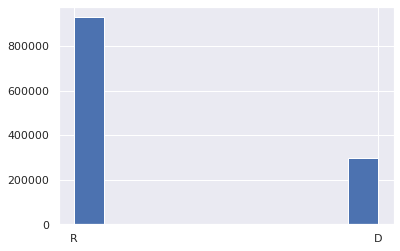

In [8]:
reddit_df['affiliation'].hist()
plt.show()